In [1]:
import mapomatic as mm
from qiskit import QuantumCircuit
from qiskit import transpile, schedule
from qiskit.tools.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit import pulse
from qiskit.pulse.library import Gaussian, GaussianSquare, Drag
from qiskit.providers.fake_provider import FakeManila
from qiskit.visualization import plot_histogram
from qiskit.circuit import Gate, Parameter
import numpy as np

backend=FakeManila()


### calibration : circuit gate -> pulse schedule

# q1 X cal

In [54]:
f=[]
for i in range(100):
    X_cal=QuantumCircuit(1)
    X_cal.x(0)
    X_cal.measure_all()
    with pulse.build(backend, name='X') as x_q0:
        pulse.play(Drag(duration=160, beta=-0.6697656325620573, amp=0.09+i*0.001, sigma=40), pulse.DriveChannel(1))
    X_cal.add_calibration('x',[1], x_q0)
    circ_transpile = transpile(X_cal, backend,initial_layout=[1])
    circ_sched=schedule(circ_transpile, backend)
    job=backend.run(circ_sched,shots=1000)
    result=job.result()
    counts = result.get_counts(X_cal)
    f.append(counts["1"]/1000)

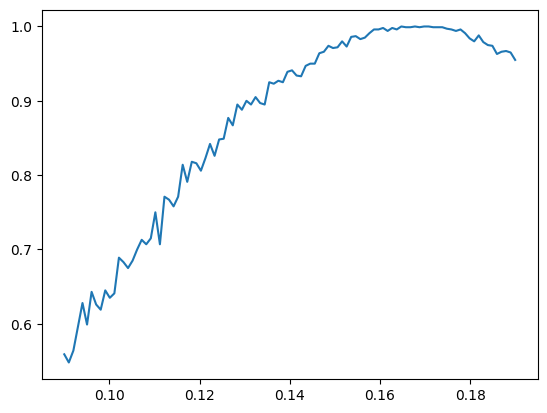

In [55]:
a=np.linspace(0.09,0.19,100)
plt.plot(a,f)
plt.show()

In [6]:
import numpy as np
from scipy.optimize import curve_fit
def _get_fitted_figure(xaxis, yaxis, init_guess, normalize=True):
        x = xaxis
        y = yaxis
        # normalization
        data = y
        if init_guess == None:
            init_guess = [0.5, np.pi, 0.5]
        else:
            init_guess = init_guess
        popt, pcov = curve_fit(_fitting_func, x, y, init_guess)
        #
        fig = plt.figure(figsize=(10, 7), dpi=400)
        fitted_y = _fitting_func(x, *popt)
        plt.plot(x, y, '--')
        plt.plot(x, fitted_y, 'o-', mfc='none')
        plt.grid()
        plt.show()
        print("Amp of peak:", x[np.argmax(fitted_y)])

def _fitting_func( x, amp, f, base):
    return amp * np.sin(f*x - np.pi/2) + base

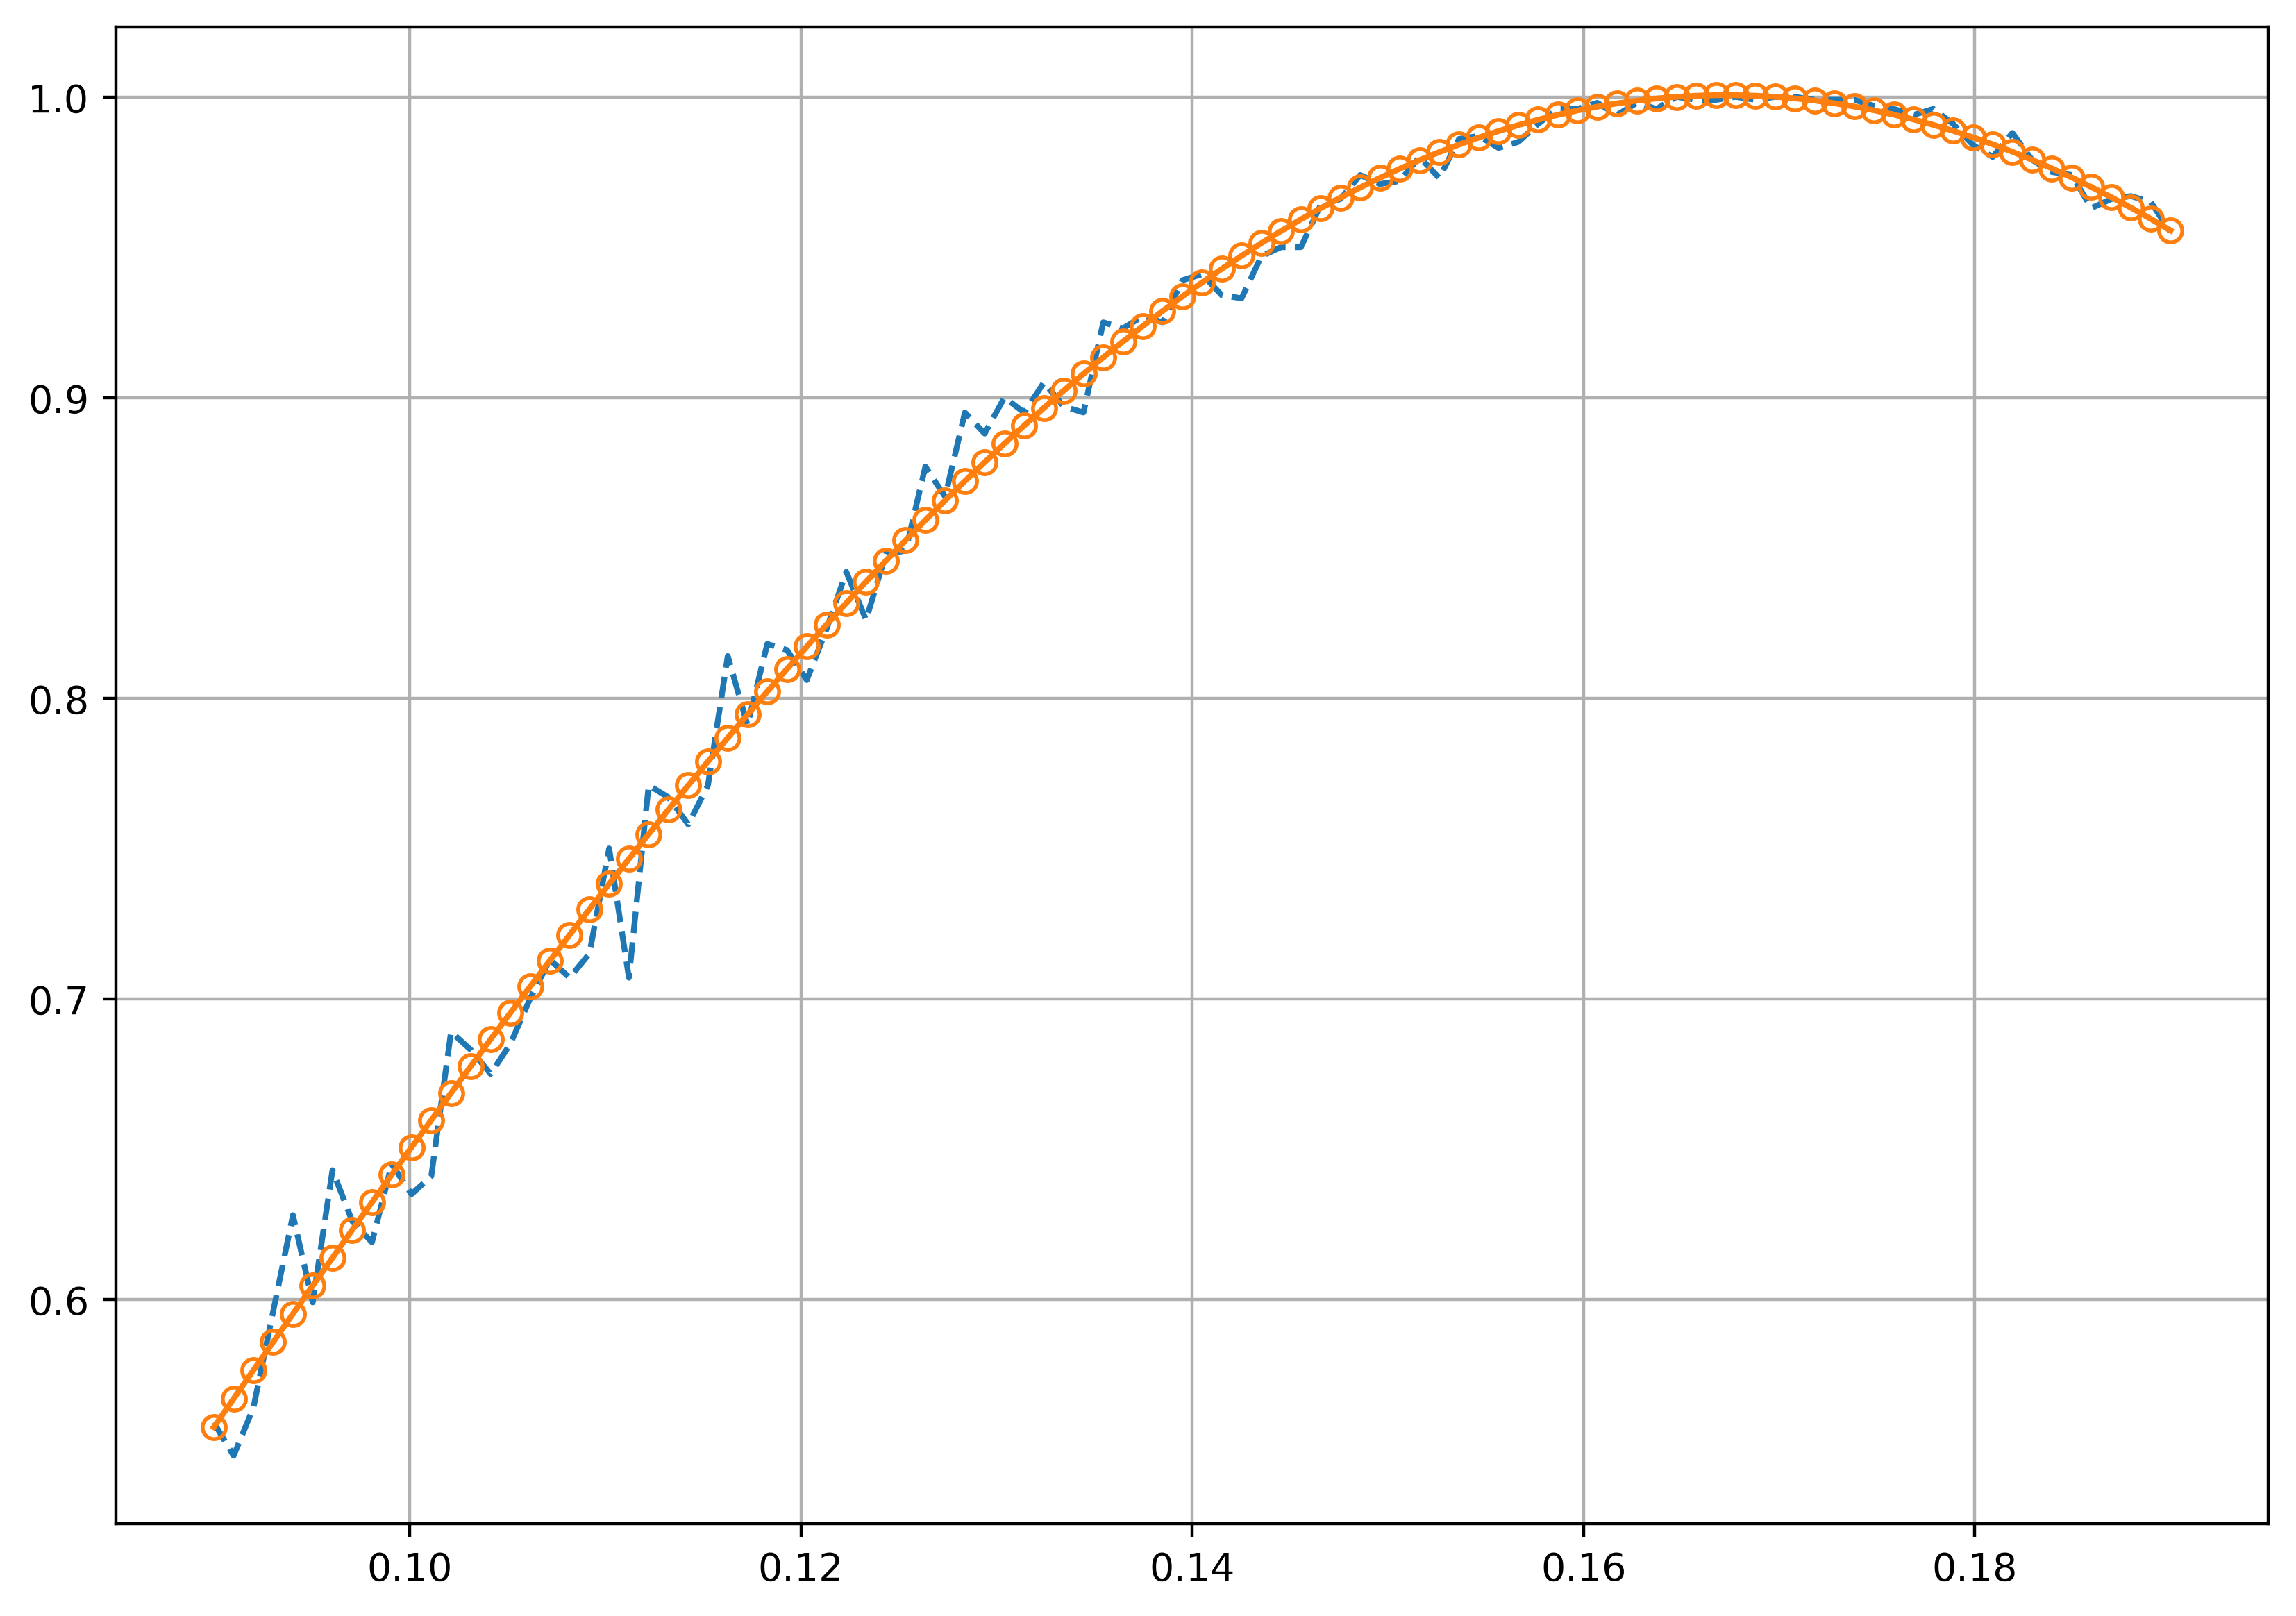

Amp of peak: 0.16777777777777778


In [57]:
_get_fitted_figure(xaxis=a,yaxis=f,init_guess = None,normalize=True)

In [58]:
f=[]
for i in range(50):
    X_cal=QuantumCircuit(1)
    X_cal.x(0)
    X_cal.measure_all()
    X_cal.calibrations
    with pulse.build(backend, name='X') as x_q0:
        pulse.play(Drag(duration=160, beta=0.7171287840008055, amp=0.16777777777777778, sigma=40), pulse.DriveChannel(1))
    X_cal.add_calibration('x',[1], x_q0)
    circ_transpile = transpile(X_cal, backend,initial_layout=[1])
    circ_sched=schedule(circ_transpile, backend)
    job=backend.run(circ_sched,shots=20000)
    result=job.result()
    counts = result.get_counts(X_cal)
    f.append(counts["1"]/20000)

In [26]:
np.mean(f)

0.9977340000000001

In [59]:
d=[]
for i in range(100):
    X_cal=QuantumCircuit(1)
    X_cal.x(0)
    X_cal.measure_all()
    X_cal.calibrations
    with pulse.build(backend, name='X') as x_q0:
        pulse.play(Drag(duration=160, beta=-3+i*0.02, amp=0.16777777777777778, sigma=40), pulse.DriveChannel(1))
    X_cal.add_calibration('x',[1], x_q0)
    circ_transpile = transpile(X_cal, backend,initial_layout=[1])
    circ_sched=schedule(circ_transpile, backend)
    job=backend.run(circ_sched,shots=10000)
    result=job.result()
    counts = result.get_counts(X_cal)
    d.append(counts["1"]/10000)

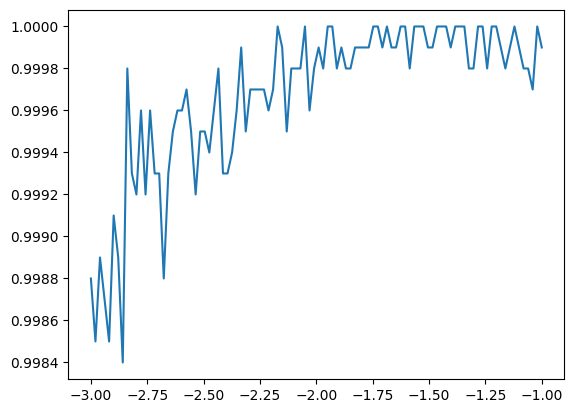

In [61]:
a=np.linspace(-3,-1,100)
plt.plot(a,d)
plt.show()

In [7]:
from scipy.optimize import curve_fit #amp를 optimzing 하는 코드
def _get_fitted_figure(xaxis, yaxis, init_guess, normalize=True):
        x = xaxis
        y = yaxis
        # normalization
        data = y
        if init_guess == None:
            init_guess = [0.5, np.pi, 0.5]
        else:
            init_guess = init_guess
        popt, pcov = curve_fit(_fitting_func, x, y, init_guess)
        #
        fig = plt.figure(figsize=(5, 4), dpi=100)
        fitted_y = _fitting_func(x, *popt)
        plt.plot(x, y, '--')
        plt.plot(x, fitted_y, 'o-', mfc='none')
        plt.grid()
        plt.show()
        print("beta of peak:", x[np.argmax(fitted_y)])
        

def _fitting_func( x, beta, amp, base): 
    return amp * np.cos( (1/2)*(np.pi)*(x-beta) ) + base #np.cos(d*x - np.pi/4) + base #이 공식 의미?

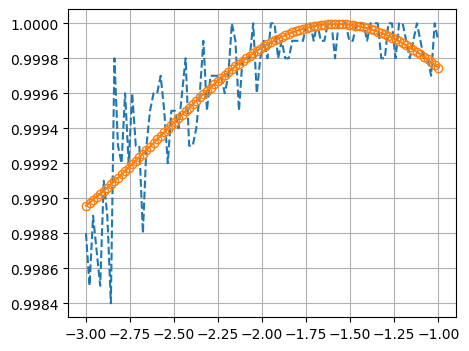

beta of peak: -1.5858585858585856


In [63]:
a=np.linspace(-3,-1,100)
_get_fitted_figure(xaxis=a,yaxis=d,init_guess = None,normalize=True)

In [67]:
d=[]
for i in range(50):
    X_cal=QuantumCircuit(1)
    X_cal.x(0)
    X_cal.measure_all()
    X_cal.calibrations
    with pulse.build(backend, name='X') as x_q0:
        pulse.play(Drag(duration=160, beta=-1.5858585858585856, amp=0.16777777777777778, sigma=40), pulse.DriveChannel(1))
    X_cal.add_calibration('x',[1], x_q0)
    circ_transpile = transpile(X_cal, backend,initial_layout=[1])
    circ_sched=schedule(circ_transpile, backend)
    job=backend.run(circ_sched,shots=20000)
    result=job.result()
    counts = result.get_counts(X_cal)
    d.append(counts["1"]/20000)

In [68]:
np.mean(d)

0.999952

# q2 X Cal

In [3]:
f=[]
for i in range(100):
    X_cal=QuantumCircuit(1)
    X_cal.x(0)
    X_cal.measure_all()
    with pulse.build(backend, name='X') as x_q2:
        pulse.play(Drag(duration=160, beta=-1.7735007652695884, amp=0.08+i*0.001, sigma=40), pulse.DriveChannel(2))
    X_cal.add_calibration('x',[2], x_q2)
    circ_transpile = transpile(X_cal, backend,initial_layout=[2])
    circ_sched=schedule(circ_transpile, backend)
    job=backend.run(circ_sched,shots=1000)
    result=job.result()
    counts = result.get_counts(X_cal)
    f.append(counts["1"]/1000)

c:\Users\kimje\anaconda3\envs\qiskit_JW\lib\site-packages\qiskit_aer\pulse\controllers\pulse_controller.py:144: UserWarning: Warning: qubit_lo_freq was not specified in PulseQobj and there is no default, so it is being automatically determined from the drift Hamiltonian.
  warn('Warning: qubit_lo_freq was not specified in PulseQobj and there is no default, '


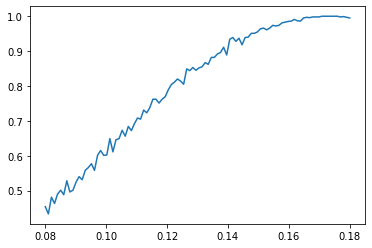

In [8]:
a=np.linspace(0.08,0.18,100)
plt.plot(a,f)
plt.show()

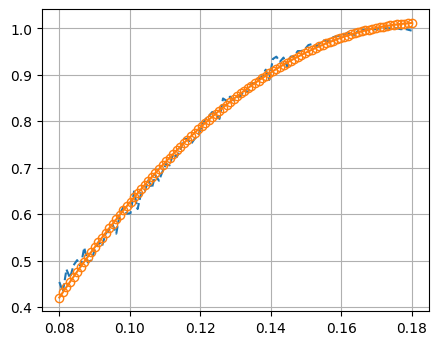

beta of peak: 0.18


In [9]:
_get_fitted_figure(xaxis=a,yaxis=f,init_guess = None,normalize=True)

In [20]:
f=[]
for i in range(50):
    X_cal=QuantumCircuit(1)
    X_cal.x(0)
    X_cal.measure_all()
    X_cal.calibrations
    with pulse.build(backend, name='X') as x_q2:
        pulse.play(Drag(duration=160, beta=-1.77350076526958845, amp=0.18, sigma=40), pulse.DriveChannel(2))
    X_cal.add_calibration('x',[2], x_q2)
    circ_transpile = transpile(X_cal, backend,initial_layout=[2])
    circ_sched=schedule(circ_transpile, backend)
    job=backend.run(circ_sched,shots=20000)
    result=job.result()
    counts = result.get_counts(X_cal)
    f.append(counts["1"]/20000)

In [21]:
np.mean(f)

0.995958

In [23]:
d=[]
for i in range(200):
    X_cal=QuantumCircuit(1)
    X_cal.x(0)
    X_cal.measure_all()
    X_cal.calibrations
    with pulse.build(backend, name='X') as x_q2:
        pulse.play(Drag(duration=160, beta=-2+i*0.01, amp=0.18, sigma=40), pulse.DriveChannel(2))
    X_cal.add_calibration('x',[2], x_q2)
    circ_transpile = transpile(X_cal, backend,initial_layout=[2])
    circ_sched=schedule(circ_transpile, backend)
    job=backend.run(circ_sched,shots=10000)
    result=job.result()
    counts = result.get_counts(X_cal)
    d.append(counts["1"]/10000)

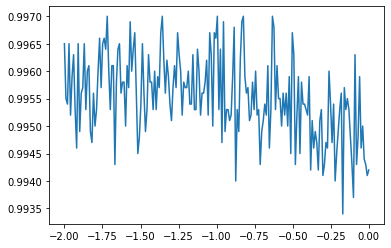

In [25]:
a=np.linspace(-2,0,200)
plt.plot(a,d)
plt.show()

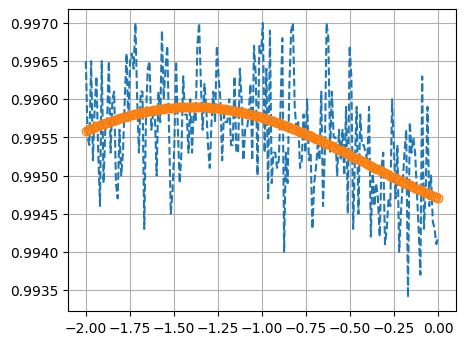

beta of peak: -1.3969849246231156


In [27]:
a=np.linspace(-2,0,200)
_get_fitted_figure(xaxis=a,yaxis=d,init_guess = None,normalize=True)

In [28]:
d=[]
for i in range(50):
    X_cal=QuantumCircuit(1)
    X_cal.x(0)
    X_cal.measure_all()
    X_cal.calibrations
    with pulse.build(backend, name='X') as x_q2:
        pulse.play(Drag(duration=160, beta=-1.3969849246231156, amp=0.18, sigma=40), pulse.DriveChannel(2))
    X_cal.add_calibration('x',[2], x_q2)
    circ_transpile = transpile(X_cal, backend,initial_layout=[2])
    circ_sched=schedule(circ_transpile, backend)
    job=backend.run(circ_sched,shots=20000)
    result=job.result()
    counts = result.get_counts(X_cal)
    d.append(counts["1"]/20000)

In [29]:
np.mean(d)

0.9959339999999999

# 원본 펄스 확인

In [39]:
backend_a=FakeManila()

In [44]:
circ=QuantumCircuit(1)
circ.x(0)
transpiled_circ=transpile(circ,backend_a,initial_layout=[1])
schedule_circ=schedule(transpiled_circ,backend_a)
schedule_circ.filter(channels=[pulse.DriveChannel(0)])

Schedule(, name="circuit-2384")

In [45]:
schedule_circ

Schedule((0, Play(Drag(duration=160, sigma=40, beta=-0.6697656325620573, amp=0.1929449503263498, angle=0.0, name='Xp_d1'), DriveChannel(1), name='Xp_d1')), name="circuit-2384")

In [46]:
f_a=[]
for i in range(50):
    circ=QuantumCircuit(1)
    circ.x(0)
    circ.measure_all()
    transpiled_circ=transpile(circ,backend_a,initial_layout=[1])
    job_a=backend_a.run(transpiled_circ,shots=20000)
    result_a=job_a.result()
    counts_a = result_a.get_counts(circ)
    f_a.append(counts_a["1"]/20000)


In [47]:
np.mean(f_a)

0.9701639999999999

In [ ]:
f_a=[]
for i in range(50):
    circ=QuantumCircuit(1)
    circ.x(0)
    circ.measure_all()
    transpiled_circ=transpile(circ,backend_a,initial_layout=[2])
    job_a=backend_a.run(transpiled_circ,shots=20000)
    result_a=job_a.result()
    counts_a = result_a.get_counts(circ)
    f_a.append(counts_a["1"]/20000)


In [45]:
qc=QuantumCircuit(1)
qc.y(0)
qc.measure_all()
transpiled_qc=transpile(qc,backend, initial_layout=[1])
schedule_qc=schedule(transpiled_qc,backend)
schedule_qc

Schedule((0, ShiftPhase(3.1415926536, DriveChannel(1))), (0, ShiftPhase(3.1415926536, ControlChannel(0))), (0, ShiftPhase(3.1415926536, ControlChannel(3))), (0, Play(Drag(duration=160, sigma=40, beta=-0.6697656325620573, amp=0.1929449503263498, angle=0.0, name='Xp_d1'), DriveChannel(1), name='Xp_d1')), (160, Acquire(22400, AcquireChannel(1), MemorySlot(0))), (160, Play(GaussianSquare(duration=22400, sigma=64, width=22144, amp=0.27, angle=2.652928848157663, name='M_m1'), MeasureChannel(1), name='M_m1')), (22560, Delay(1680, MeasureChannel(1))), name="circuit-1922")

# CX Cal


In [2]:
with pulse.build(backend, name='Xq1') as x_q1:
    pulse.play(Drag(duration=160, beta=-1.5858585858585856, amp=0.16777777777777778, sigma=40), pulse.DriveChannel(1))
with pulse.build(backend,name='Yq1') as y_q1:
    pulse.shift_phase(np.pi,pulse.DriveChannel(1))
    pulse.shift_phase(np.pi,pulse.ControlChannel(0))
    pulse.shift_phase(np.pi,pulse.ControlChannel(3))
    pulse.play(Drag(duration=160, sigma=40, beta=-1.5858585858585856, amp=0.16777777777777778),pulse.DriveChannel(1))
with pulse.build(backend,name='Xq2') as x_q2:
    pulse.play(Drag(duration=160, sigma=40, beta=-1.3969849246231156, amp=0.18),pulse.DriveChannel(2))

In [32]:


# with pulse.build(backend, name='cx12L_U') as cx12L_U:    
#     pulse.play(GaussianSquare(duration=896,width=640, amp=0.79+i*0.001, sigma=64, angle=2.4570734332647075), pulse.ControlChannel(2))
# with pulse.build(backend, name='cx12R') as cx_q12R:
#     pulse.play(GaussianSquare(duration=896,width=640, amp=0.03+i*0.001, sigma=64, angle=-3.1079898390087513), pulse.DriveChannel(2))
# with pulse.build(backend, name='cx12R_U') as cx12R_U:    
#     pulse.play(GaussianSquare(duration=896,width=640, amp=0.79+i*0.001, sigma=64, angle=-0.6845192203250859), pulse.ControlChannel(2))
f=[]
for i in range(100):
    cxCal=QuantumCircuit(2)
    cxCal.x(0)
    cxCal.cx(0,1)
    cxCal.measure_all()
    cxCal.add_calibration('x',[1],x_q1)  
    cxCal.add_calibration('y',[1],y_q1)
    cxCal.add_calibration('x',[2],x_q2)
    with pulse.build(backend, name='cx12L') as cx_q12L:
        pulse.play(GaussianSquare(duration=896,width=640, amp=0.033+i*0.001, sigma=64), pulse.DriveChannel(2))    
    cxCal.add_calibration('cx',(1,2), cx_q12L)
    # cxCal.add_calibration('cx',(1,2), cx_q12R)
    # cxCal.add_calibration('cx',(1,2), cx12L_U)
    # cxCal.add_calibration('cx',(1,2), cx12R_U)
    circ_transpile = transpile(cxCal, backend, initial_layout=[1,2])
    circ_sched=schedule(circ_transpile, backend)
    result=backend.run(circ_sched, shots=1000).result()
    counts=result.get_counts()
    


c:\Users\kimje\anaconda3\envs\qiskit_JW\lib\site-packages\qiskit_aer\pulse\controllers\pulse_controller.py:144: UserWarning: Warning: qubit_lo_freq was not specified in PulseQobj and there is no default, so it is being automatically determined from the drift Hamiltonian.
  warn('Warning: qubit_lo_freq was not specified in PulseQobj and there is no default, '


In [33]:
counts

{'01': 1000}

In [5]:
cxCal=QuantumCircuit(2)
cxCal.x(0)
cxCal.cx(0,1)
cxCal.measure_all()
# cxCal.add_calibration('x',[1],x_q1)  
# cxCal.add_calibration('y',[1],y_q1)
# cxCal.add_calibration('x',[2],x_q2)
# with pulse.build(backend, name='cx12L') as cx_q12L:
#     pulse.play(GaussianSquare(duration=896,width=640, amp=0.033, sigma=64), pulse.DriveChannel(2))  
# with pulse.build(backend, name='cx12R') as cx_q12R:
#     pulse.play(GaussianSquare(duration=896,width=640, amp=0.033, sigma=64, angle=-3.1079898390087513), pulse.DriveChannel(2))   
# cxCal.add_calibration('cx',(1,2), cx_q12L)
# cxCal.add_calibration('cx',(1,2), cx_q12R)
    # cxCal.add_calibration('cx',(1,2), cx_q12R)
    # cxCal.add_calibration('cx',(1,2), cx12L_U)
    # cxCal.add_calibration('cx',(1,2), cx12R_U)
circ_transpile = transpile(cxCal, backend, initial_layout=[1,2])
#circ_sched=schedule(circ_transpile, backend)
result=backend.run(circ_transpile, shots=1000).result()
counts=result.get_counts()

In [6]:
counts

{'11': 917, '10': 32, '01': 50, '00': 1}

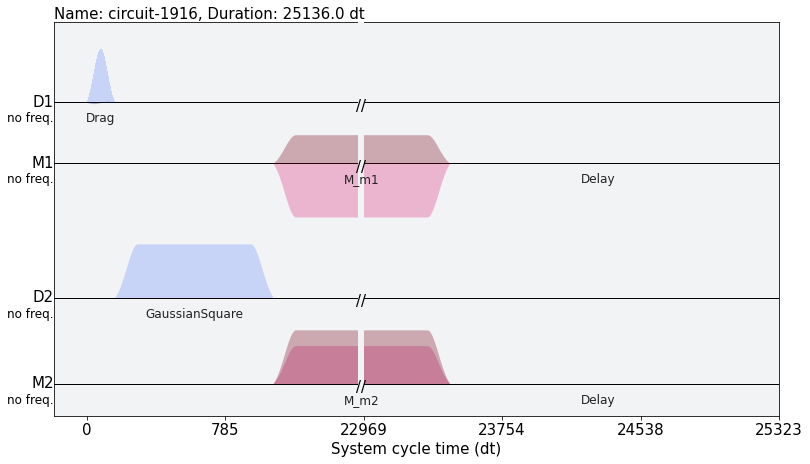

In [40]:
circ_sched.draw()

In [37]:
counts

{'01': 1000}

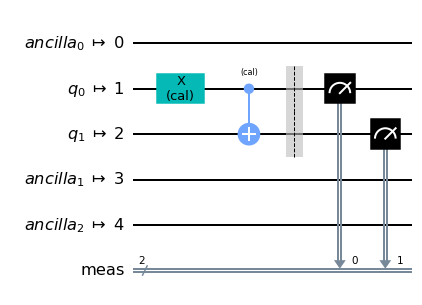

In [38]:
circ_transpile.draw('mpl')